# Tutorial 2: Highlighting

Following the parametrization of phenylmethanimine in Tutorial 1, let's visualize the correspondance between atoms and coarse-grained beads. 

First let's import a number of packages, especially `auto_martini`, various `rdkit` submodules, as well as `IPython.display.Image` to visualize an image in the notebook, and `numpy`.

In [1]:
import auto_martini as am
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import Image
import rdkit
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
print(rdkit.__version__)

2019.09.3


RDKit WARNING: [08:40:34] Enabling RDKit 2019.09.3 jupyter extensions


# Parametrization (recap of Tutorial 1)

We'll rerun the parametrization performed in Tutorial 1.

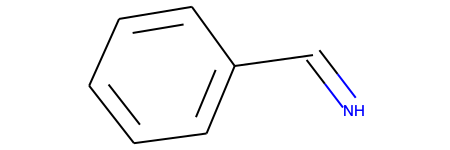

In [2]:
smiles = "N=Cc1ccccc1"
mol = Chem.MolFromSmiles(smiles)
Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
mol

In [3]:
# Load the molecule in auto_martini and coarse-grain it
mol_am, _ = am.topology.gen_molecule_smi(smiles)
cg = am.solver.Cg_molecule(mol_am, "PHM")

Converged to solution in 1 iteration(s)


# Highlighting atoms and CG beads

To link atoms to coarse-grained beads, it's useful to have a look at a few `Cg_molecule` attributes:
- `cg.list_heavyatom_names`: lists the chemical elements of each heavy atom
- `cg.cg_bead_names`: lists the CG bead names
- `cg.atom_partitioning`: dictionary relating atom ID to CG bead ID.
We'll mostly make use of the last one, here

In [4]:
print("list_heavyatom_names:",cg.list_heavyatom_names)
print("cg_bead_names:       ",cg.cg_bead_names)
print("atom_partitioning:   ",cg.atom_partitioning)

list_heavyatom_names: ['N', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
cg_bead_names:        ['S01', 'S02', 'S03']
atom_partitioning:    {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2}


We'll want to color atoms according to beads, so let's define a color palette

In [5]:
colors = [(0.121, 0.466, 0.705), (1.0, 0.498, 0.0549), (0.172, 0.627, 0.172)]

`rdkit` offers convenient rendering functions to highlight particular atoms and bonds. We will color heavy atoms involved in a particular CG bead. First let's focus on atoms: for each atom we want the CG bead ID it maps to. This is simply obtained from the `keys()` of the `atom_partinioning` dictionary. As for the colors, we can use the `colors` array defined above.

In [6]:
hit_ats = list(cg.atom_partitioning.keys())
atom_cols = {}
for i, at in enumerate(hit_ats):
    atom_cols[at] = colors[cg.atom_partitioning[i]%4]

Same for bonds. `rdkit` here comes to the rescue, because it keeps track of which heavy atoms are connected by bonds.

In [7]:
hit_bonds = []
bond_cols = {}
for i, at in enumerate(hit_ats):
    for j, att in enumerate(hit_ats):
        if i > j and atom_cols[i] == atom_cols[j] and mol.GetBondBetweenAtoms(i,j):
            b_idx = mol.GetBondBetweenAtoms(i,j).GetIdx()
            hit_bonds.append(b_idx)
            bond_cols[b_idx] = colors[cg.atom_partitioning[i]%4]

We now have all the necessary ingredients to render a molecule with the appropriate atom and bond highlighting. Here we use the `rdMolDraw2D` from `rdkit`. We'll save this to a file, and render the file in the notebook:

In [13]:
d = rdMolDraw2D.MolDraw2DCairo(400,400)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, 
                                   highlightAtoms=hit_ats,
                                  highlightAtomColors=atom_cols,
                                  highlightBonds=hit_bonds,
                                  highlightBondColors=bond_cols)
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('phm_highlight.png')

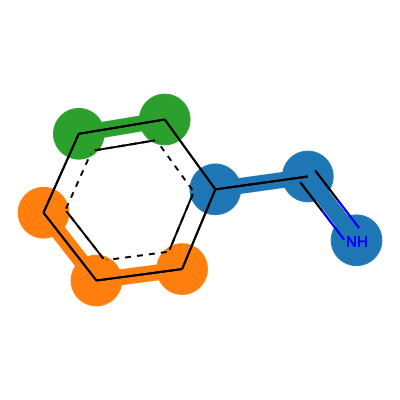

In [14]:
Image('phm_highlight.png')

# Conclusions

`auto_martini` offers a way to relate atoms to CG beads. The combination with `rdkit` allows you to visualize how atoms get mapped onto CG beads.